### Canny edge detection algorithm was used and visualised to detect how all our algorithms operate for edge preservation on the real patient data.

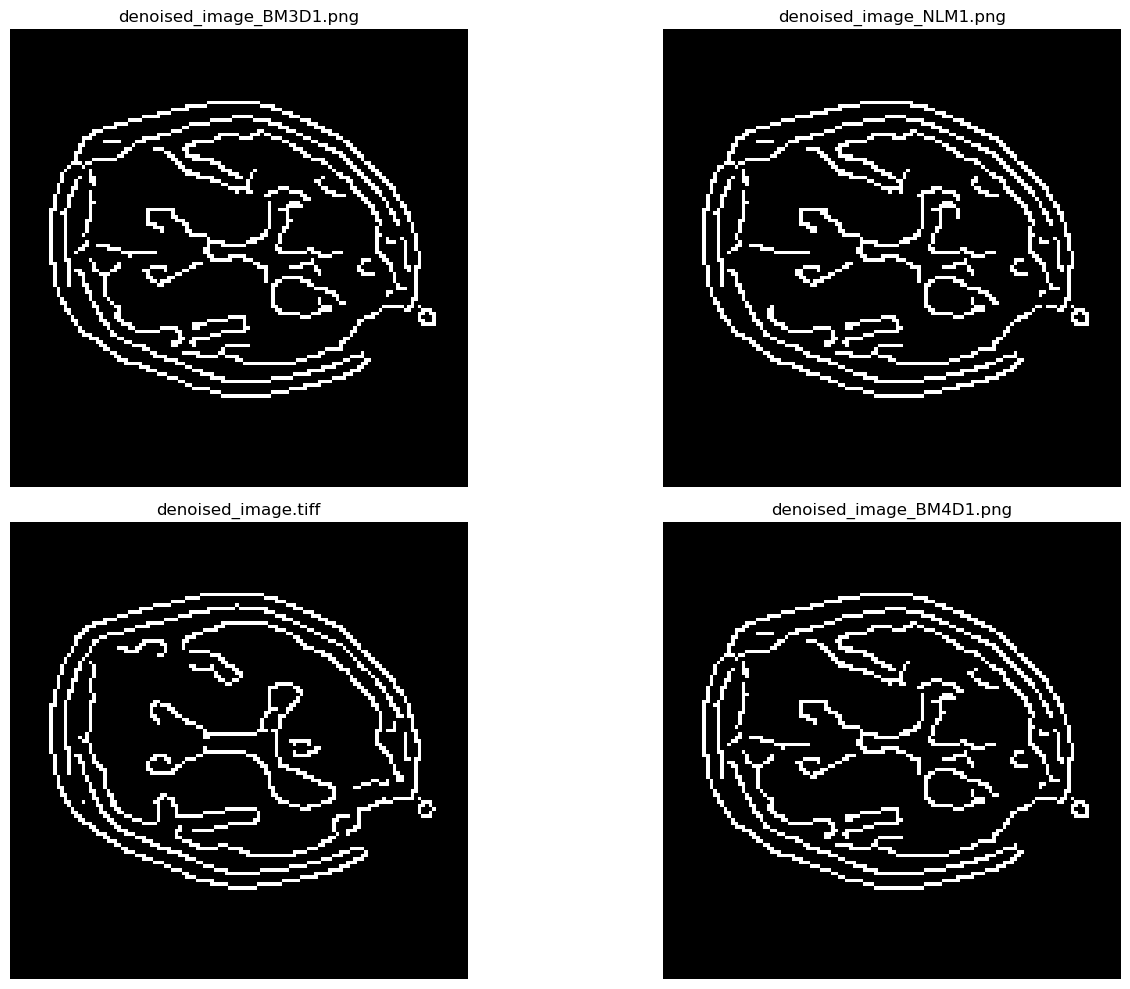

In [7]:
from skimage.io import imread
from skimage.color import rgb2gray, rgba2rgb
from skimage import feature
import matplotlib.pyplot as plt
import numpy as np

def apply_canny_edge_detection(image_path, sigma=1.0):
    """
    Apply Canny edge detection to a given image, ensuring the input image is 2D.
    
    :param image_path: Path to the image file.
    :param sigma: Standard deviation of the Gaussian filter used in Canny edge detector.
    :return: Edge-detected image.
    """
    # Load the image
    image = imread(image_path)
    
    # Check and convert the image to 2D (grayscale) if necessary
    if image.ndim == 3:
        # If 4 channels, convert to RGB first
        if image.shape[2] == 4:
            image = rgba2rgb(image)
        # Convert RGB to grayscale
        image = rgb2gray(image)
    elif image.ndim != 2:
        raise ValueError(f"Unsupported image dimensionality: {image.ndim}. Image must be grayscale or RGB/RGBA.")
    
    # Apply Canny edge detector
    edges = feature.canny(image, sigma=sigma)
    
    return edges

def visualize_edges(image_paths, sigma=1.0):
    """
    Visualize edges detected in all images in a single figure, correctly handling different image formats.

    :param image_paths: List of paths to the image files.
    :param sigma: Standard deviation of the Gaussian filter used in Canny edge detector.
    """
    num_images = len(image_paths)
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows

    plt.figure(figsize=(15, nrows * 5))

    for i, image_path in enumerate(image_paths, start=1):
        try:
            edges = apply_canny_edge_detection(image_path, sigma=sigma)
            plt.subplot(nrows, ncols, i)
            plt.imshow(edges, cmap='gray')
            title = image_path.split('/')[-1]
            plt.title(title)
            plt.axis('off')
        except ValueError as e:
            print(f"Error processing {image_path}: {e}")

    plt.tight_layout()
    plt.show()


image_paths = [
    '../../Experiments/DenoisedImages/RealPatientDataDenoising/BM3D/denoised_image_BM3D1.png',
    '../../Experiments/DenoisedImages/RealPatientDataDenoising/NLM/denoised_image_NLM1.png',
    '../../Experiments/DenoisedImages/RealPatientDataDenoising/TV/denoised_image.tiff',
    '../../Experiments/DenoisedImages/RealPatientDataDenoising/BM4D/denoised_image_BM4D1.png']


visualize_edges(image_paths, sigma=1.5) 

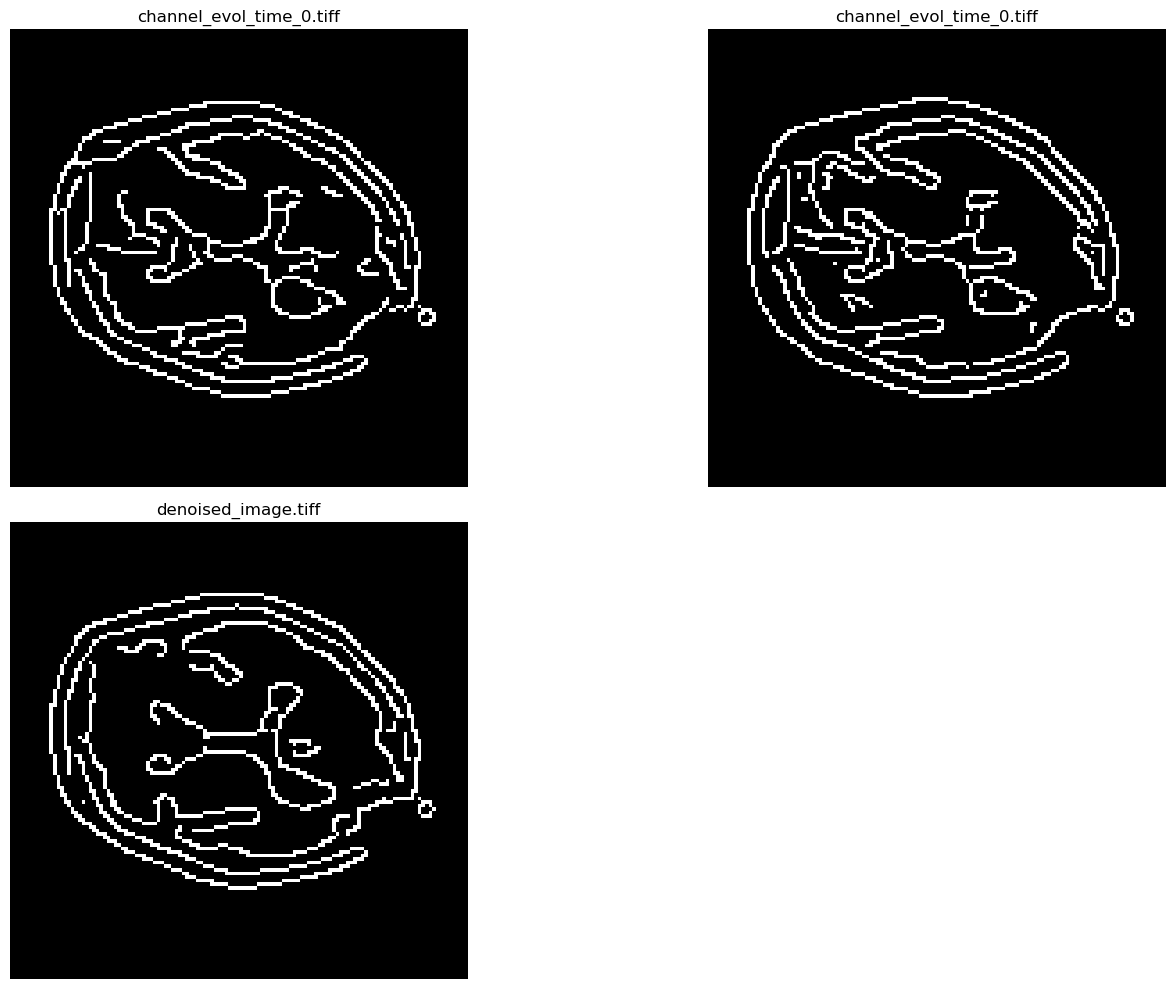

In [1]:
from skimage.io import imread
from skimage.color import rgb2gray, rgba2rgb
from skimage import feature
import matplotlib.pyplot as plt
import numpy as np

def apply_canny_edge_detection(image_path, sigma=1.0):
    """
    Apply Canny edge detection to a given image, ensuring the input image is 2D.
    
    :param image_path: Path to the image file.
    :param sigma: Standard deviation of the Gaussian filter used in Canny edge detector.
    :return: Edge-detected image.
    """
    # Load the image
    image = imread(image_path)
    
    # Check and convert the image to 2D (grayscale) if necessary
    if image.ndim == 3:
        # If RGBA, convert to RGB first
        if image.shape[2] == 4:
            image = rgba2rgb(image)
        # Convert RGB or RGBA-converted-to-RGB to grayscale
        image = rgb2gray(image)
    elif image.ndim != 2:
        raise ValueError(f"Unsupported image dimensionality: {image.ndim}. Image must be grayscale or RGB/RGBA.")
    
    # Apply Canny edge detector
    edges = feature.canny(image, sigma=sigma)

    
    return edges

def visualize_edges(image_paths, sigma=1.0):
    """
    Visualize edges detected in all images in a single figure, correctly handling different image formats.

    :param image_paths: List of paths to the image files.
    :param sigma: Standard deviation of the Gaussian filter used in Canny edge detector.
    """
    num_images = len(image_paths)
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows

    plt.figure(figsize=(15, nrows * 5))

    for i, image_path in enumerate(image_paths, start=1):
        try:
            edges = apply_canny_edge_detection(image_path, sigma=sigma)
            plt.subplot(nrows, ncols, i)
            plt.imshow(edges, cmap='gray')
            title = image_path.split('/')[-1]
            plt.title(title)
            plt.axis('off')
        except ValueError as e:
            print(f"Error processing {image_path}: {e}")

    plt.tight_layout()
    plt.show()


image_paths = [
    '../../Experiments/DenoisedImages/RealPatientDataDenoising/NoisyData_N2F/channel_evol_time_0.tiff',
    '../../Experiments/DenoisedImages/RealPatientDataDenoising/NoisyData_N2S/channel_evol_time_0.tiff',
    '../../Experiments/DenoisedImages/RealPatientDataDenoising/Patch2Self/denoised_image.tiff',
]


visualize_edges(image_paths, sigma=1.5) 